In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

In [2]:
def nonDYZAluFinder(df, name):
    nonRepeatAlus = {}

    for row in df.index:
        SR=0
        Sat=0
        Sine=0

        for repeat in ast.literal_eval(df.at[row,'Group']):
            if 'Satellite' in repeat:
                Sat+=1
            elif 'SINE/Alu' in repeat:
                Sine+=1

            elif 'Simple_repeat' in repeat:
                SR+=1

            else:
                continue

        if SR==1 and Sat ==1 and Sine ==1:
            continue

        elif SR>1 and Sat ==1 and Sine ==1:
            continue
        else:
            nonRepeatAlus[row]={'SimpleRepeat':SR, 'Satellite':Sat, 'SINE/Alu':Sine}
            
    tempDf = df.loc[list(nonRepeatAlus.keys())].copy()
    tempDf2 = tempDf[tempDf['KMode_cluster']!='GraveYard'].drop(columns=['KMode_cluster']).copy()
    tempList = []
    
    for row in tempDf2.index:
        if '+_' in row:
            continue
        else:
            tempList.append(row)
    
    tempDf2['SampleName']=name
    #.loc[tempList]
    return(tempDf2)

In [3]:
########################### IMPORT DATAFRAMES #######################################

In [17]:
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/HG00358_rbDF2_Kmode.csv").set_index("Alu")
#HG02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02666/HG02666_rbDF2_Kmode.csv").set_index("Alu")
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/HC02666_rbDF2_Kmode.csv").set_index("Alu")
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/HG01106_rbDF2_Kmode.csv").set_index("Alu")
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/HG02011_rbDF2_Kmode.csv").set_index("Alu")
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/HG01890_rbDF2_Kmode.csv").set_index("Alu")
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/HG01952_rbDF2_Kmode.csv").set_index("Alu")
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/T2T_rbDF2_Kmode.csv").set_index("Alu")

In [18]:
HG00358_nonDYZDF = nonDYZAluFinder(HG00358, 'HG00358')
#HG02666_nonDYZDF = nonDYZAluFinder(HG02666, 'HG02666')
HC02666_nonDYZDF = nonDYZAluFinder(HC02666, 'HC02666')
HG01106_nonDYZDF = nonDYZAluFinder(HG01106, 'HG01106')
HG02011_nonDYZDF = nonDYZAluFinder(HG02011, 'HG02011')
HG01890_nonDYZDF = nonDYZAluFinder(HG01890, 'HG01890')
HG01952_nonDYZDF = nonDYZAluFinder(HG01952, 'HG01952')
T2T_nonDYZDF = nonDYZAluFinder(T2T, 'T2T')

In [19]:
allSamplesDF = pd.concat([HG00358_nonDYZDF,HC02666_nonDYZDF,HG01890_nonDYZDF,HG01952_nonDYZDF,T2T_nonDYZDF,HG01106_nonDYZDF,HG02011_nonDYZDF]).copy()

(array([82., 20.,  1.,  0., 12.,  0.,  7.,  0., 13.,  3.]),
 array([ 744., 1010., 1276., 1542., 1808., 2074., 2340., 2606., 2872.,
        3138., 3404.]),
 <BarContainer object of 10 artists>)

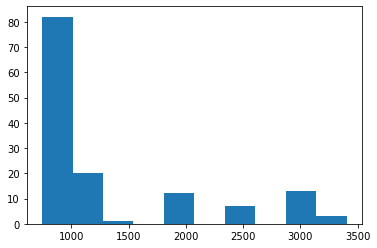

In [20]:
plt.hist(allSamplesDF['Lengths'])

In [21]:
aluDivergence = []
for row in allSamplesDF.index:
    if allSamplesDF.at[row,'SampleName'] == 'T2T':
        for repeat in ast.literal_eval(allSamplesDF.at[row,'Group']):
            if 'SINE/Alu' in repeat:
                aluDivergence.append(float(repeat.split(" ")[1]))
    else:
        for repeat in ast.literal_eval(allSamplesDF.at[row,'Group']):
            if 'SINE/Alu' in repeat:
                aluDivergence.append(float(repeat.split(" ")[2]))

allSamplesDF['Divergence'] = aluDivergence

In [22]:
set(allSamplesDF['SampleName'])

{'HC02666', 'HG00358', 'HG01106', 'HG01890', 'HG01952', 'HG02011', 'T2T'}

<AxesSubplot:xlabel='Lengths', ylabel='Divergence'>

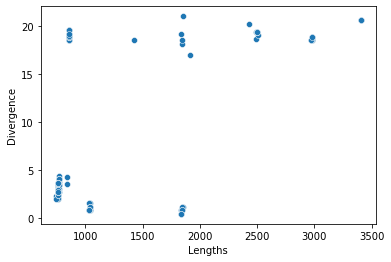

In [23]:
sns.scatterplot(x=allSamplesDF['Lengths'], y=allSamplesDF['Divergence'])

In [24]:
#allSamplesDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/AllSamples_nonDYZ_AluBlocks.csv")